<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3
#### Alumno: Mateo Murgia 
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Hernan Ledesma


# Introducción

El análisis espectral de señales en el dominio discreto se realiza a través de la **Transformada Discreta de Fourier (DFT)**, herramienta fundamental en el procesamiento digital de señales ya que permite obtener la distribución en frecuencia de una señal finita.  
La DFT de una señal \(x[n]\) de longitud \(N\) se define como:  

$$
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
$$

y su transformada inversa permite reconstruir la señal original a partir de sus componentes frecuenciales:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \, e^{j \frac{2\pi}{N}kn}
$$

La **resolución en frecuencia** de la DFT depende de la frecuencia de muestreo \(f_s\) y del tamaño de la transformada \(N\):  

$$
\Delta f = \frac{f_s}{N}
$$

Cuando una señal sinusoidal de frecuencia \(f_0\) no coincide exactamente con un múltiplo entero de \(\Delta f\), es decir:  

$$
f_0 = \left( k_0 + \delta \right) \Delta f , \quad \delta \neq 0
$$

se produce el fenómeno de **desparramo espectral** (*spectral leakage*). En este caso, la energía que debería concentrarse en un único bin frecuencial se distribuye en frecuencias adyacentes. Esto se refleja en la **densidad espectral de potencia (PSD)**:  

$$
P[k] = \frac{1}{N} |X[k]|^2
$$

El análisis energético se fundamenta en la **identidad de Parseval**, que garantiza la equivalencia entre la energía en el dominio temporal y en el frecuencial:  

$$
\sum_{n=0}^{N-1} |x[n]|^2 \;=\; \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

Para mejorar la visualización del espectro se utiliza la técnica de **zero padding**, que consiste en extender la señal original con ceros antes de calcular la DFT. De esta forma, el número de puntos de la transformada aumenta y la resolución frecuencial se refina:  

$$
N' = N + N_{\text{zeros}} \quad \Rightarrow \quad \Delta f' = \frac{f_s}{N'} < \Delta f
$$

Si bien este procedimiento no añade información nueva, permite interpolar el espectro y representar con mayor detalle las frecuencias presentes.  

Finalmente, el empleo de **funciones ventana** (rectangular, Hamming, Hanning, Blackman, entre otras) busca mitigar los efectos del truncamiento de la señal en el tiempo. Al multiplicar la señal original por una ventana \(w[n]\):  

$$
x_w[n] = x[n] \cdot w[n]
$$

se obtiene un espectro modificado: el ventaneo reduce los lóbulos laterales en el dominio frecuencial, aunque a costa de ensanchar el lóbulo principal, lo que implica un compromiso entre resolución y supresión de artefactos.  

En este trabajo se estudiará el **desparramo espectral** a partir de señales senoidales con frecuencias cercanas a múltiplos de $$ \Delta f $$. Se graficarán sus densidades espectrales de potencia, se verificará la **identidad de Parseval** y se analizarán los efectos del **zero padding** y el **ventaneo** sobre la representación espectral discreta.  


# Desarrollo experimental


# Fig. 1 
En esta imagen armé en orden todos los gráficos necesarios para resolver los ejercicios propuestos


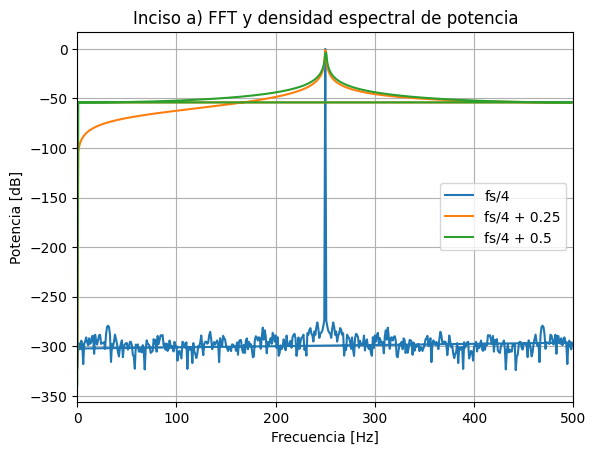


Señal fs/4:
 Potencia tiempo = 1.00000
 Potencia frec   = 1.00000
 Diferencia (A-B) = -2.22e-16
 ✅ Se cumple Parseval

Señal fs/4 + 0.25:
 Potencia tiempo = 1.00000
 Potencia frec   = 1.00000
 Diferencia (A-B) = -2.22e-16
 ✅ Se cumple Parseval

Señal fs/4 + 0.5:
 Potencia tiempo = 1.00000
 Potencia frec   = 1.00000
 Diferencia (A-B) = -4.44e-16
 ✅ Se cumple Parseval


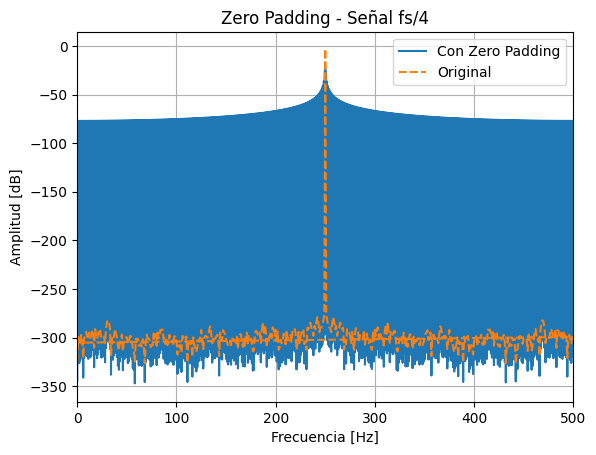

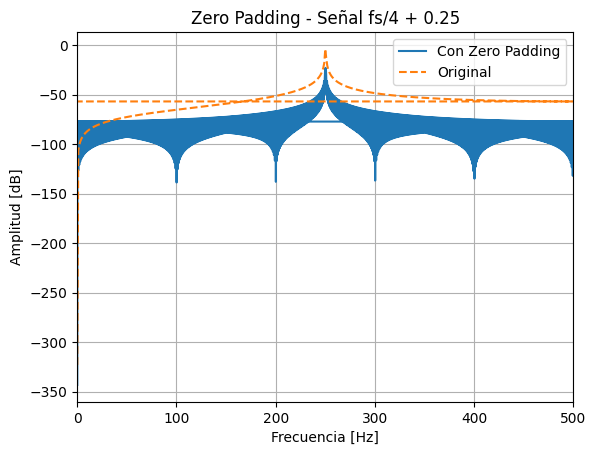

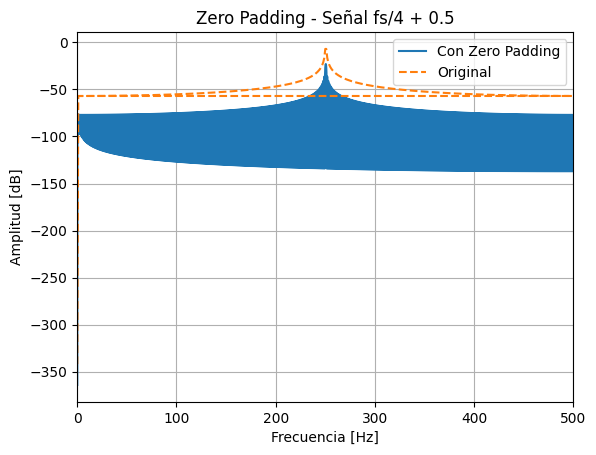

In [3]:
# -*- coding: utf-8 -*-
"""
TP3 - Incisos a, b y c
Autor: Mateo
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

# Parámetros
fs = 1000      # Frecuencia de muestreo
N = 1000       # Número de muestras
Ts = 1/fs
deltaF = fs/N
tt = np.arange(N)*Ts
freqs = np.fft.fftfreq(N, Ts)  # Eje de frecuencias

# --------------------
# Función senoidal normalizada (varianza unitaria)
# --------------------
def mi_funcion_sen(f, N, fs, a0=1, fase=0):
    Ts = 1/fs
    tt = np.arange(N) * Ts
    x = a0 * np.sin(2*np.pi*f*tt + fase)
    x = x - x.mean()                     # quitar media
    x = x / np.std(x)                    # normalizar varianza = 1
    return tt, x

# Señales: fs/4, fs/4+0.25 y fs/4+0.5 (en Δf)
tt, x1 = mi_funcion_sen(f = (N/4) * deltaF, N=N, fs=fs)
tt, x2 = mi_funcion_sen(f = ((N/4) + 0.25) * deltaF, N=N, fs=fs)
tt, x3 = mi_funcion_sen(f = ((N/4) + 0.5) * deltaF, N=N, fs=fs)

# FFTs
X1, X2, X3 = fft(x1), fft(x2), fft(x3)
X1abs, X2abs, X3abs = 1/N * np.abs(X1), 1/N * np.abs(X2), 1/N * np.abs(X3)

# --------------------
# Inciso a) Graficar PSDs
# --------------------
plt.figure()
plt.title("Inciso a) FFT y densidad espectral de potencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.grid(True)
plt.plot(freqs, 10*np.log10(2*X1abs**2), label="fs/4")
plt.plot(freqs, 10*np.log10(2*X2abs**2), label="fs/4 + 0.25")
plt.plot(freqs, 10*np.log10(2*X3abs**2), label="fs/4 + 0.5")
plt.xlim((0, fs/2))
plt.legend()
plt.show()

# --------------------
# Inciso b) Verificación de Parseval
# --------------------
def verificar_parseval(x, X, N, nombre=""):
    A = np.sum(np.abs(x)**2) / N        # potencia en el tiempo
    B = np.sum(np.abs(X)**2) / N**2     # potencia en frecuencia
    dif = A - B
    print(f"\nSeñal {nombre}:")
    print(f" Potencia tiempo = {A:.5f}")
    print(f" Potencia frec   = {B:.5f}")
    print(f" Diferencia (A-B) = {dif:.2e}")
    
    if np.isclose(A, B, rtol=1e-10, atol=1e-12):
        print(" ✅ Se cumple Parseval")
    else:
        print(" ❌ No se cumple Parseval")

verificar_parseval(x1, X1, N, "fs/4")
verificar_parseval(x2, X2, N, "fs/4 + 0.25")
verificar_parseval(x3, X3, N, "fs/4 + 0.5")

# --------------------
# Inciso c) Zero Padding a las tres señales
# --------------------
def aplicar_zero_padding(x, N, factor=10):
    zeros = np.zeros(len(x)*(factor-1))       # agrego ceros
    xPadding = np.concatenate((x, zeros))     # señal extendida
    XPadding = fft(xPadding)                  # FFT
    Npad = len(xPadding)
    freqs_pad = np.fft.fftfreq(Npad, 1/fs)    # eje de frecuencias
    return xPadding, XPadding, freqs_pad, Npad

# Aplicar zero padding a las tres señales
x1_pad, X1_pad, freqs_pad, Npad = aplicar_zero_padding(x1, N, factor=10)
x2_pad, X2_pad, freqs_pad, Npad = aplicar_zero_padding(x2, N, factor=10)
x3_pad, X3_pad, freqs_pad, Npad = aplicar_zero_padding(x3, N, factor=10)

# Gráficos comparativos
plt.figure()
plt.title("Zero Padding - Señal fs/4")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.plot(freqs_pad, 20*np.log10(np.abs(X1_pad)/Npad), label="Con Zero Padding")
plt.plot(freqs, 20*np.log10(np.abs(X1)/N), "--", label="Original")
plt.xlim((0, fs/2))
plt.legend()

plt.figure()
plt.title("Zero Padding - Señal fs/4 + 0.25")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.plot(freqs_pad, 20*np.log10(np.abs(X2_pad)/Npad), label="Con Zero Padding")
plt.plot(freqs, 20*np.log10(np.abs(X2)/N), "--", label="Original")
plt.xlim((0, fs/2))
plt.legend()

plt.figure()
plt.title("Zero Padding - Señal fs/4 + 0.5")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.plot(freqs_pad, 20*np.log10(np.abs(X3_pad)/Npad), label="Con Zero Padding")
plt.plot(freqs, 20*np.log10(np.abs(X3)/N), "--", label="Original")
plt.xlim((0, fs/2))
plt.legend()

plt.show()


# Análisis de resultados

## Inciso a) FFT y PSD de las tres senoidales

### Qué estoy viendo y por qué pasa

**Caso \( f_0 = \tfrac{f_s}{4} \) (alineado al bin):**  
La DFT muestrea el espectro en múltiplos de:

$$
\Delta f = \frac{f_s}{N}
$$

Cuando la senoidal cumple:

$$
f_0 = k_0 \, \Delta f \quad (\delta = 0),
$$

la señal completa un número entero de ciclos dentro de la ventana rectangular de \(N\) muestras.  
El DTFT del segmento ventaneado se obtiene multiplicando en tiempo por \(w[n]\) (rectangular) y, en frecuencia, se **convoluciona** con la respuesta de esa ventana, cuyo núcleo es el **Dirichlet**:

$$
W\!\left(e^{j\omega}\right) \;=\; e^{-j\omega\frac{N-1}{2}} \cdot \frac{\sin\!\left(\tfrac{N\omega}{2}\right)}{\sin\!\left(\tfrac{\omega}{2}\right)}
$$

Entonces, para una senoidal:

$$
x[n] = \sin(\omega_0 n)\, w[n],
$$

el DTFT resulta (a grandes rasgos):

$$
X\!\left(e^{j\omega}\right) \;\propto\; W\!\left(e^{j(\omega - \omega_0)}\right) \;-\; W\!\left(e^{j(\omega + \omega_0)}\right)
$$

La DFT toma **muestras** de ese DTFT en:

$$
\omega_k = \frac{2\pi k}{N}
$$

Como \(f_0\) cae exactamente en un bin, muestreo el **máximo** del lóbulo principal y a la vez caigo en los **ceros** de los lóbulos laterales.  
Resultado: se ve **un solo pico limpio**, sin desparramo.

---

**Casos \( f_0 = \tfrac{f_s}{4} + 0.25\,\Delta f \) y \( f_0 = \tfrac{f_s}{4} + 0.5\,\Delta f \) (desintonías fraccionales):**  

Ahora:

$$
f_0 = (k_0 + \delta)\,\Delta f, 
\qquad 
\delta \neq 0
$$

El Dirichlet es el mismo, pero lo muestreo **corridito** respecto de los bins; la energía que antes quedaba en un solo bin ahora se **reparte** entre vecinos (**spectral leakage**).

- Con \(\delta = 0.25\), la energía se reparte de forma **asimétrica** alrededor del bin más cercano.  
- Con \(\delta = 0.5\), el máximo real queda **exactamente entre dos bins** y la energía se divide casi **a la mitad** en ambos.  
- Los lóbulos laterales del rectangular aparecen al nivel característico (primer lóbulo \(\approx -13\,\text{dB}\)) y decaen aproximadamente como \(\tfrac{1}{f}\).  
- Las muescas periódicas que se ven son los **ceros del Dirichlet**, ubicados cada \(\Delta f\).  

Como la señal es real, el espectro cumple:

$$
X[k] = X^{*}[N-k]
$$

por eso el gráfico es simétrico respecto de:

$$
\frac{f_s}{2}
$$

---

## Inciso b) Parseval (por qué el “área total” se mantiene aunque la forma cambie)

### Qué estoy verificando

La identidad de Parseval establece que:

$$
\frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2 
\;=\; 
\frac{1}{N^2}\sum_{k=0}^{N-1} |X[k]|^2
$$

Es decir, la **potencia promedio temporal** es igual a la **potencia total espectral** (con el escalado correcto).  
Yo normalicé las señales a varianza unitaria, así que la comparación ya viene bien dimensionada.

---

### Por qué se cumple aunque los espectros sean distintos

El leakage redistribuye energía entre bins, pero no la crea ni la destruye.  
La ventana rectangular actúa como un **filtro en frecuencia** (el Dirichlet), que **convoluciona** el espectro ideal de la senoidal (dos deltas) con su respuesta.  
Esa convolución ensancha y genera lóbulos, pero la suma total sigue siendo la misma: Parseval.

Las diferencias microscópicas que aparecen en los cálculos son del orden de:

$$
10^{-16}
$$

lo cual corresponde a la **precisión numérica** de la máquina, no a un error físico.

---

## Inciso c) Zero padding en las tres señales

### Qué cambia visualmente y por qué

Al agregar \(9N\) ceros, la longitud de la señal pasa a:

$$
N' = 10N
$$

y la resolución frecuencial mejora a:

$$
\Delta f' = \frac{f_s}{N'} = \frac{\Delta f}{10}
$$

Esto interpola el DTFT en más puntos, lo que hace que el espectro se vea más suave.

- En la señal **\(f_s/4\) exacta**, el pico sigue cayendo en un bin, pero ahora se ve **más definido** y el piso **más continuo** gracias al muestreo en frecuencia más denso.  
- En **\(f_s/4 + 0.25\,\Delta f\)** y **\(f_s/4 + 0.5\,\Delta f\)**, el **leakage** persiste (porque es propio de la ventana rectangular), pero los lóbulos laterales se ven **más claros** y se identifican bien los **ceros** del Dirichlet cada \(\Delta f'\).  
- El zero padding **no cambia** la **anchura real del lóbulo principal** (≈ \(2\,\Delta f\)); lo que cambia es que tengo **10× más puntos** sobre la misma envolvente, por eso la curva aparece **más densa y suave**.


# Conclusión

El trabajo permitió verificar de manera experimental los conceptos fundamentales del análisis espectral en señales discretas:

- La **Transformada Discreta de Fourier (DFT)** permitió observar cómo una señal periódica se representa en el dominio de la frecuencia y cómo el muestreo en múltiplos de \(\Delta f\) determina la forma de su espectro.  
- Se comprobó que, cuando la frecuencia de la senoidal coincide con un múltiplo entero de \(\Delta f\), la energía queda contenida en un único bin; mientras que en frecuencias no alineadas aparece el **leakage espectral**, redistribuyendo energía en los bins vecinos.  
- La **identidad de Parseval** se verificó con gran precisión: la potencia promedio en el tiempo coincidió con la potencia total en frecuencia, confirmando la conservación de energía independientemente de la forma del espectro.  
- La técnica de **zero padding** permitió mejorar la resolución en el dominio de la frecuencia, mostrando con más claridad los lóbulos y ceros del Dirichlet, aunque sin eliminar el leakage (ya que este depende de la ventana utilizada).  

En conclusión, los resultados obtenidos validan la teoría estudiada: la DFT describe cómo las señales se distribuyen en frecuencia, Parseval garantiza la conservación de energía, y el zero padding ofrece una mejor visualización y estimación de frecuencias sin modificar el contenido energético de la señal. Esto fortaleció el vínculo entre los conceptos matemáticos y las simulaciones prácticas en Python.

---

# Autoevaluación del aprendizaje

Durante la realización del trabajo logré afianzar varios conceptos importantes de la materia:

- Comprendí en profundidad cómo la DFT discretiza el espectro y qué significa que una frecuencia esté o no alineada con un bin.  
- Diferencié claramente entre la forma del espectro (con leakage o sin él) y la potencia total de la señal, entendiendo el rol de la identidad de Parseval.  
- Pude visualizar de manera práctica el efecto del **zero padding**: mejora la resolución frecuencial sin alterar la potencia ni la anchura real de los lóbulos.  
- Al comparar señales cercanas en frecuencia, entendí cómo incluso diferencias pequeñas respecto a \(\Delta f\) generan espectros muy distintos.  

Además, reforcé el uso de herramientas como **Jupyter Notebook, NumPy y Matplotlib** para el análisis, representación y validación numérica de resultados, lo cual me permitió interpretar mejor la teoría.  

Finalmente, utilicé **ChatGPT** como apoyo para:  
- Redactar y organizar las secciones teóricas del informe (introducción, análisis y conclusiones).  
- Aclarar dudas puntuales sobre el significado físico de los resultados obtenidos (Parseval, leakage y zero padding).  

Este proceso me permitió consolidar la teoría vista en clase con la práctica computacional, integrando el análisis matemático con simulaciones claras y visuales.
